# ifm_contrib: Mesh - Pandas Extension

The `doc.c.mesh.gdf` object provides access to the mesh geometry as GeoPandas Geodataframes. GeoPANDAS is a Python library with powerfull features for 2D Geometry operations.

*contact: [Alex Renz](https://github.com/red5alex), are@dhigroup.com* 

In [1]:
import sys
sys.path.append("C:/Program Files/DHI/2019/FEFLOW 7.2/python")
import ifm_contrib as ifm 
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("./example_data/example_2D.dac")

The `doc.c.mesh.gdf` object provides functions to obtain the model elements as a GeoDataframe (2D and 3D Layered only).

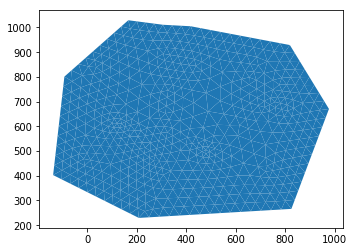

In [2]:
%matplotlib inline
doc.c.mesh.gdf.getGeoDatframe().plot()

It is possible to add model parameters to the GeoDataFrame by specifying a dictionary `{ <column_name>: <Paramater id>}`. The `Parameter id` is best taken from `ifm.Enum` (constants starting with `P_`).  

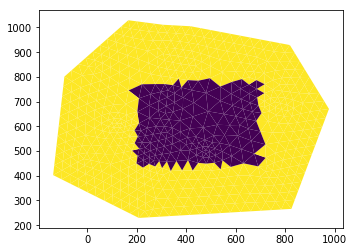

In [3]:
from ifm import Enum

# get dataframe including Transmissivity
gdf = doc.c.mesh.gdf.getGeoDatframe({"Transmissivity" : Enum.P_TRANS})
gdf.plot("Transmissivity", label="Transmissivity")

in combination with the `doc.c.sel` object, we can easily locate the elements belonging to a specified item selection.

In [4]:
# see which selections are available
# note: returns selections of all types if no type is specified 
doc.c.sel.getSelectionNames()

['west', 'east', 'upper_half']

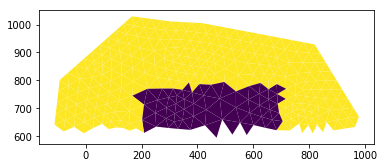

In [5]:
# plot the transmissivity only for the elemental selection 'upper_half'
gdf.iloc[doc.c.sel.list('upper_half')].plot("Transmissivity")